In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

In [4]:
df = pd.read_csv("data/phase_3_titanic_dataset.csv")

from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(columns=['survived'])  # all columns except the label
y = df['survived']                 # the target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test data
    random_state=42,      # for reproducibility
    stratify=y            # ensures class balance in both sets
)


In [5]:
import joblib

# Load the trained model
rf_model = joblib.load('models/random_forest_model.pkl')


---

### ✅ **1. Feature Importance (for Random Forest)**

This shows which features your model considers most important.


         Feature  Importance
6    sex_encoded    0.372145
5      fare_norm    0.157967
4       age_norm    0.155316
0         pclass    0.088757
10   class_Third    0.076257
1          sibsp    0.044119
2          parch    0.033136
9   class_Second    0.025306
3          alone    0.020626
8     embarked_S    0.016054
7     embarked_Q    0.010317


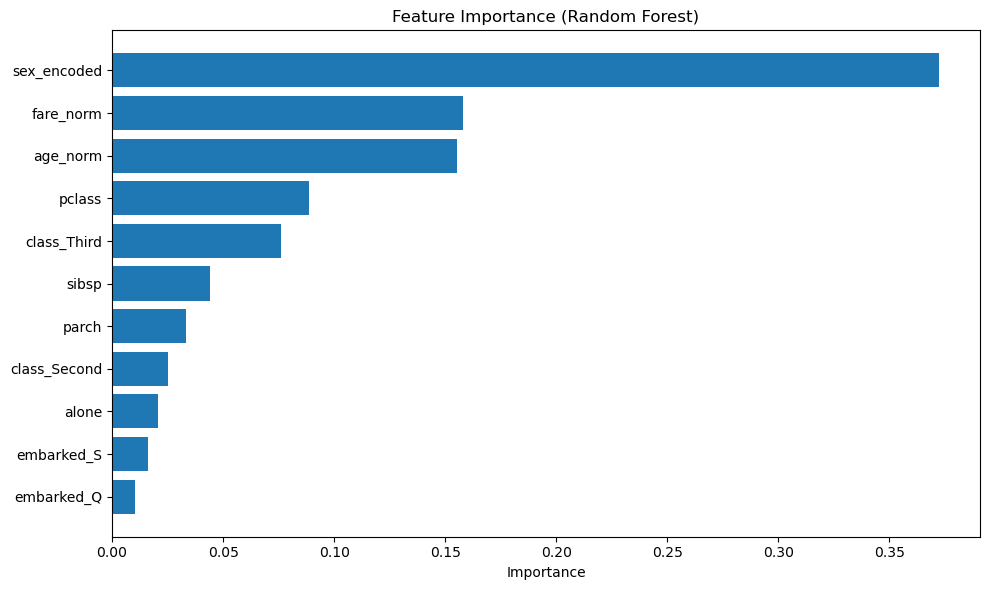

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better display
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the table
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


> 📌 This will help you understand which features (e.g. `sex_encoded`, `fare_norm`, etc.) drive predictions the most.
### ✅ **2. Cross-Validation Scores on Multiple Metrics**

Use cross-validation not just for accuracy, but also for recall (important for survivors — class 1).

In [7]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring)

In [8]:
# Print average scores
for score in scoring:
    print(f"{score.capitalize()} (CV average): {cv_results['test_' + score].mean():.4f}")


Accuracy (CV average): 0.7660
Precision (CV average): 0.7071
Recall (CV average): 0.6174
F1 (CV average): 0.6572


> 📌 This shows how well the model performs across folds — especially important for `recall`, since you're concerned about catching more survivors.


🔍 1. Feature Importance (Random Forest)

| Feature       | Importance |
| ------------- | ---------- |
| `sex_encoded` | 0.3721     |
| `fare_norm`   | 0.1580     |
| `age_norm`    | 0.1553     |
| `pclass`      | 0.0888     |
| `class_Third` | 0.0763     |
| *others*      | < 0.05     |


✅ Interpretation:
- sex_encoded (i.e., male/female) is the most important feature.
- fare_norm and age_norm are also highly influential.
- Features like embarked_Q, embarked_S, and alone have low importance.
- You might experiment by removing low-importance features (e.g., < 0.02) and retraining — it may simplify the model and slightly improve generalization.

📈 2. Cross-Validation Scores (CV)

| Metric    | CV Avg Score |
| --------- | ------------ |
| Accuracy  | 0.7660       |
| Precision | 0.7071       |
| Recall    | 0.6174       |
| F1-score  | 0.6572       |


✅ Interpretation:
- Recall is still low (61.7%), meaning the model misses some survivors (class 1).
- Precision is decent (70.7%), so when it predicts survivors, it’s often correct.
- F1-score balances both, and it's modest (65.7%).